### HD 17156
Notebook to test new functionality in 1.1.20 to cope with eccentric orbits where $a\cos(i)/R_s > (1+k)$

New definition of $W$ is

- W:     $(R_s/a)\sqrt{(1+k)^2 - b^2}/\pi$ or $-(R_s/a)\sqrt{b^2-(1+k)^2 }/\pi$ if $b > (1+k)$

where

- D:     $(R_p/R_s)^2 = k^2$
- b:     $=a\cos(i)/R_s$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycheops import Dataset, MultiVisit

In [2]:
file_key = 'CH_PR140074_TG000504_V0300'
dataset = Dataset(file_key)
time,flux,flux_err = dataset.get_lightcurve(aperture='DEFAULT',decontaminate=True)


Found archive tgzfile /Users/pflm/pycheops/data/CH_PR140074_TG000504_V0300.tgz
 PI name     : TUNDE Akinsanmi
 OBS ID      : 2643466
 Target      : HD 17156
 Coordinates : 02:49:44.49 +71:45:11.6
 Spec. type  : G0V
 G magnitude : 8.03 +- 0.00
Light curve data loaded from  /Users/pflm/pycheops/data/CH_PR140074_TG000504_V0300-DEFAULT.fits
Time stored relative to BJD = 2460675
Aperture radius used = 25.0 arcsec
UTC start:  2024-12-31T09:17:53
UTC end:    2024-12-31T19:04:18
Visit duration: 35149 s
Exposure time: 2 x 18.0 s
Target location on CCD: (488.6, 481.6)
Number of non-flagged data points: 546
Efficiency (non-flagged data): 56.0 %
Light curve corrected for flux from background stars
Mean counts = 37544756.5
Median counts = 37624125.9
RMS counts = 310955.0 [8265 ppm]
Median standard error = 6175.6 [164 ppm]
Median background = 232320 e-
Mean contamination = 308.5 ppm
Mean smearing correction = 10.1 ppm
Predicted amplitude of ramp = 222 ppm



Rejected 11 points more than 4.0 x MAD = 2734 ppm from the median


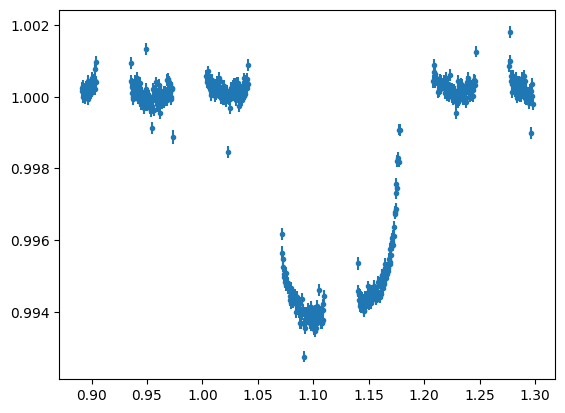

In [3]:
time,flux,flux_err = dataset.clip_outliers(clip=4)
plt.errorbar(time,flux,flux_err,fmt='.');

In [4]:
#PlanetProperties from Kokori et al. 2023
from uncertainties import ufloat
from uncertainties.umath import *
P  =  21.2164387
Tc = ufloat(2455499.305815, 0.000082)	
ω_deg = ufloat(121.7, 0.4)	
e = ufloat(0.677, 0.003)
aR = ufloat(23.2,0.3)
k = ufloat(0.0745, 0.0003)
inc = ufloat(86.49, 0.24)


In [5]:
sini = sin(radians(inc))
print(f'{sini = :0.5f}')
b = cos(radians(inc))*aR
print(f'{b = :.3f}')
W = -sqrt(b**2-(1+k)**2 )/np.pi/aR
print(f'{W = :.3f}')
D = k**2
print(f'{D = :.5f}')
cycle = np.round((dataset.bjd_ref-Tc.n)/P)
T_0 = Tc + cycle*P - dataset.bjd_ref
print(f'{T_0 = :.5f}')
f_c = sqrt(e)*cos(radians(ω_deg))
f_s = sqrt(e)*sin(radians(ω_deg))
print(f'{f_c = :0.4f}')
print(f'{f_s = :0.4f}')

sini = 0.99812+/-0.00026
b = 1.420+/-0.099
W = -0.013+/-0.002
D = 0.00555+/-0.00004
T_0 = 1.11686+/-0.00008
f_c = -0.4324+/-0.0050
f_s = 0.7000+/-0.0034


In [6]:
k_ = sqrt(D)
print(f'{k_ = :.5f}')
q = (1+k)**2 - b**2
r_star = np.pi*abs(W)/sqrt(abs(q))
print(f'{1/r_star = :.5f}')
q = 1-b**2*r_star**2
sini = sqrt(q)
i = degrees(asin(sini))
print(f'{i = :.5f}')


k_ = 0.07450+/-0.00030
1/r_star = 23.20000+/-0.30000
i = 86.49000+/-0.24000


In [7]:
result0 = dataset.lmfit_transit(T_0, P, D, W, b,f_c, f_s,c=[0.9,1.1])

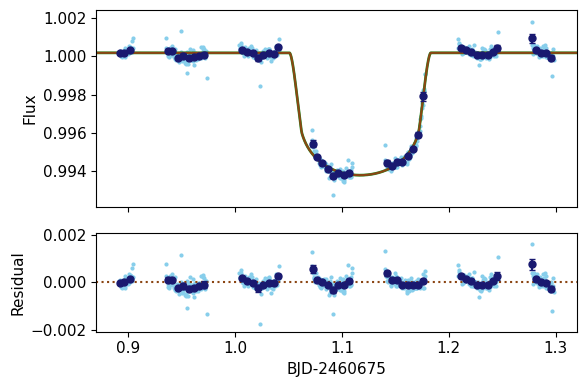

In [8]:
dataset.plot_lmfit();

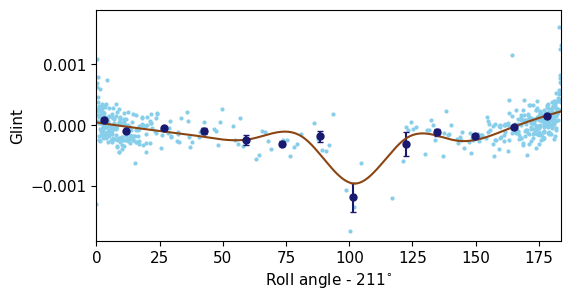

In [9]:
glint_func = dataset.add_glint()

In [10]:
resultg = dataset.lmfit_transit(T_0, P, D, W, b,f_c, f_s,c=[0.9,1.1], glint_scale=[0,2])

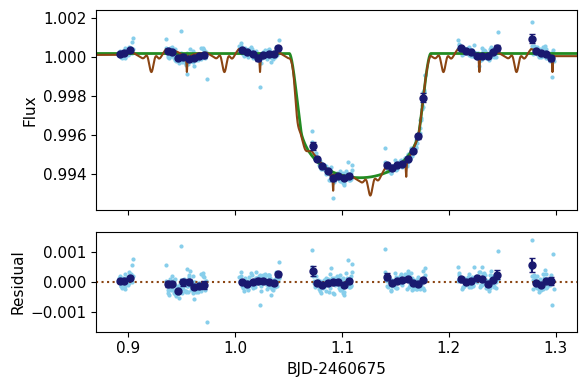

In [11]:
dataset.plot_lmfit();

In [12]:
dataset.save(overwrite=True)

'HD_17156__CH_PR140074_TG000504_V0300.dataset'

In [13]:
file_key = 'CH_PR140074_TG000503_V0300'
dataset = Dataset(file_key)
time,flux,flux_err = dataset.get_lightcurve(aperture='DEFAULT',decontaminate=True)

Found archive tgzfile /Users/pflm/pycheops/data/CH_PR140074_TG000503_V0300.tgz
 PI name     : TUNDE Akinsanmi
 OBS ID      : 2592447
 Target      : HD 17156
 Coordinates : 02:49:44.49 +71:45:11.6
 Spec. type  : G0V
 G magnitude : 8.03 +- 0.00
Light curve data loaded from  /Users/pflm/pycheops/data/CH_PR140074_TG000503_V0300-DEFAULT.fits
Time stored relative to BJD = 2460633
Aperture radius used = 25.0 arcsec
UTC start:  2024-11-18T23:26:22
UTC end:    2024-11-19T08:30:44
Visit duration: 32626 s
Exposure time: 2 x 18.0 s
Target location on CCD: (488.6, 481.6)
Number of non-flagged data points: 550
Efficiency (non-flagged data): 60.6 %
Light curve corrected for flux from background stars
Mean counts = 37584534.3
Median counts = 37644469.3
RMS counts = 100293.9 [2664 ppm]
Median standard error = 6176.3 [164 ppm]
Median background = 225169 e-
Mean contamination = 302.9 ppm
Mean smearing correction = 9.0 ppm
Predicted amplitude of ramp = 89 ppm



Rejected 12 points more than 4.0 x MAD = 676 ppm from the median


'HD_17156__CH_PR140074_TG000503_V0300.dataset'

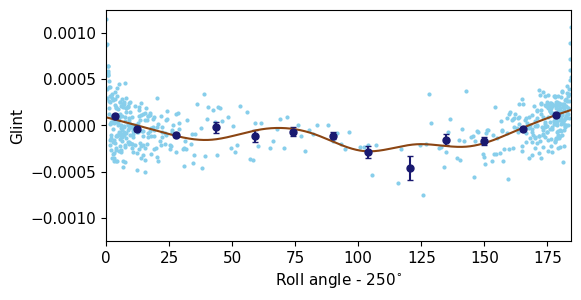

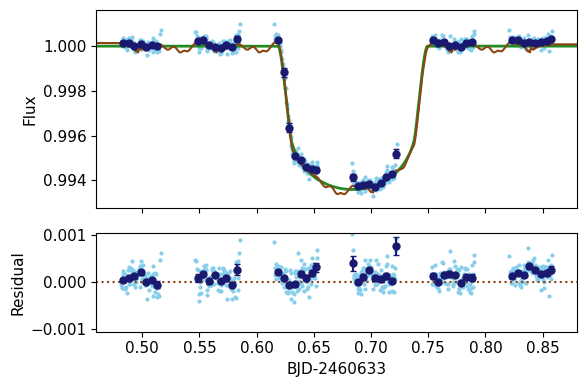

In [14]:
time,flux,flux_err = dataset.clip_outliers(clip=4)
T_0 = Tc + cycle*P - dataset.bjd_ref
result0 = dataset.lmfit_transit(T_0, P, D, W, b,f_c, f_s, c=[0.9,1,1])
glint_func = dataset.add_glint()
resultg = dataset.lmfit_transit(T_0, P, D, W, b,f_c, f_s, c=[0.9,1,1], glint_scale=[0,2])
dataset.plot_lmfit()
dataset.save(overwrite=True)

In [15]:
M = MultiVisit('HD_17156', id_kws={'dace':False})

Identifier : HD_17156
Coordinates: 02:49:44.49 +71:45:11.6
log g :  4.20 +/- 0.01    [SWEET-Cat (gaia)]
log rho : -0.39 +/- 0.05  (solar units)


 N  file_key                   Aperture last_ GP Glint Scale pipe_ver extra
 --------------------------------------------------------------------------
  1 CH_PR140074_TG000503_V0300 DEFAULT  lmfit No  Yes   n/a    15.0.0     0
  2 CH_PR140074_TG000504_V0300 DEFAULT  lmfit No  Yes   n/a    15.0.0     0


In [ ]:
T_0 = M.tzero(Tc, P)
result = M.fit_transit(T_0=T_0, P=P, D=D, W=W, b=b, 
                       log_sigma_w=ufloat(-10,5), 
                       burn=512, steps=256, nwalkers=128) 

Running burn-in ..


100%|██████████| 512/512 [02:46<00:00,  3.08it/s]

Running sampler ..



 38%|███▊      | 97/256 [00:38<01:07,  2.36it/s]

In [ ]:
M.plot_fit(binwidth=0.0005,detrend=True,gap_tol=0.001,data_offset=0.005);